- boxplot
  - boxplot (plt)
  - boxplot (sns)
- No of outliers
- No of non outliers
- Whole data vs Non-Outliers data
- How to deal with outliers
  - replace with median
  - replace with q1,q3
- np.where() ***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\Rajasri\Documents\DATA SCIENCE Naresh IT\Data files\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


### boxplot

- used to detect outliers
- min,Q1,Q2,Q3,max values
- inside boxplot red line represent median, which is 50 percentile data
- outliers
  - mild
    q1-1.5xIQR and q1-1.5*IQR
  - strong
    q1-3xIQR and q1-3*IQR
- IQR =Q3-Q1

- q1=25p
- q2=50p
- q3=75p

In [3]:
col=visa_df.select_dtypes(exclude="object").columns
col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

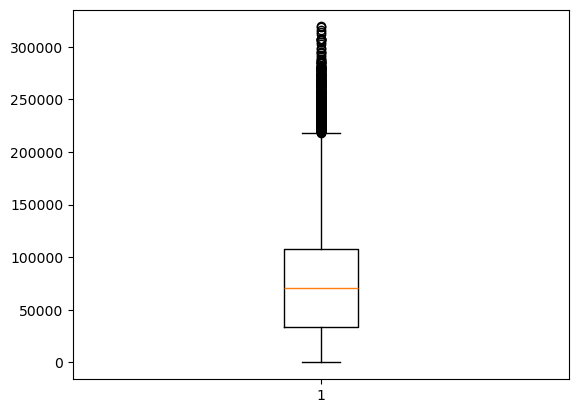

In [4]:
plt.boxplot(visa_df["prevailing_wage"])
plt.show()

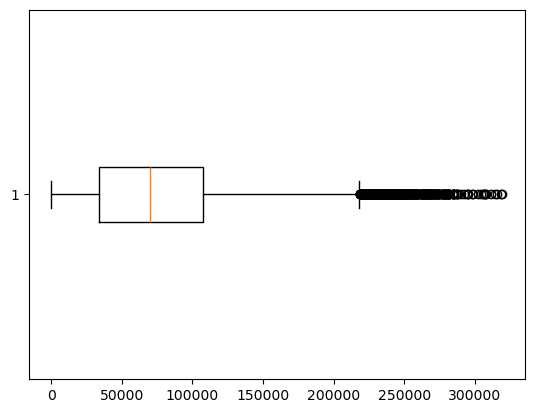

In [5]:
plt.boxplot(visa_df["prevailing_wage"],vert=False)
plt.show()

<Axes: ylabel='prevailing_wage'>

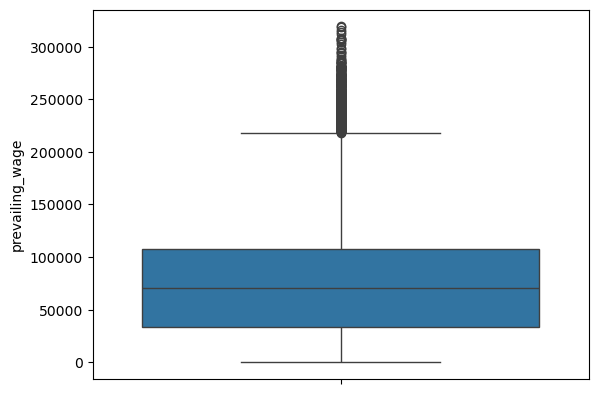

In [6]:
sns.boxplot(visa_df["prevailing_wage"])

<Axes: xlabel='prevailing_wage'>

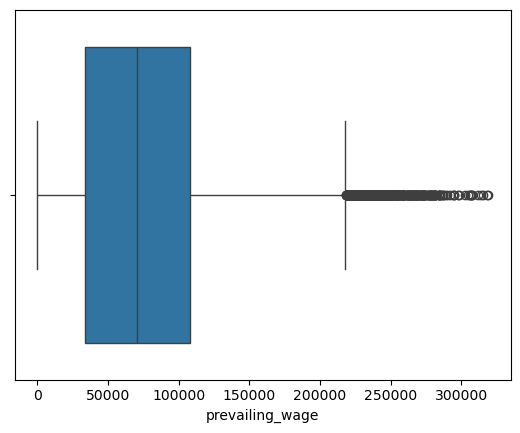

In [7]:
sns.boxplot(visa_df["prevailing_wage"],orient="h")

### subplot

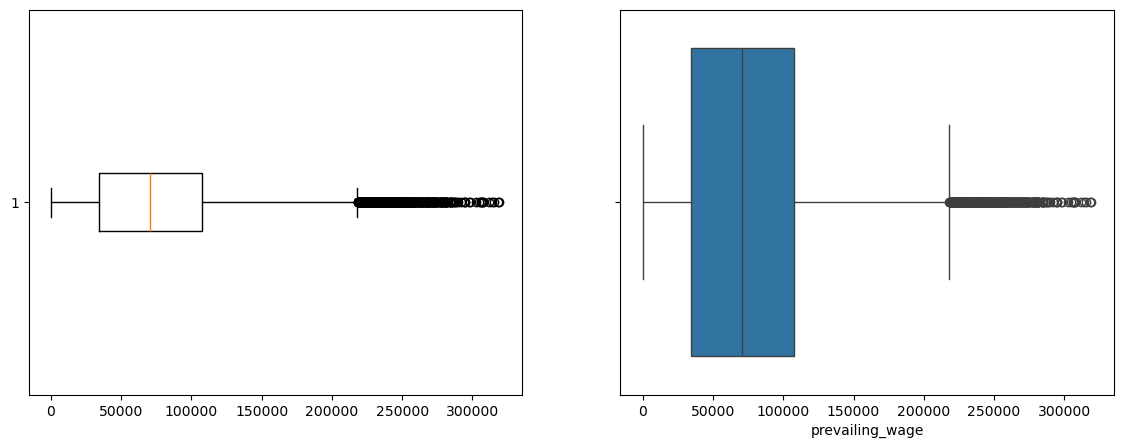

In [8]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage"],vert=False)

plt.subplot(1,2,2)
sns.boxplot(visa_df["prevailing_wage"],orient="h")

plt.show()

### outliers

- how many outliers

- outliers
  - mild
    > q1-1.5xIQR and < q1-1.5*IQR
  - strong
    > q1-3xIQR and < q1-3*IQR

In [9]:
q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr

con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub

out=len(visa_df[con1 | con2])
out

427

In [10]:
q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr

con1=visa_df["prevailing_wage"]>lb
con2=visa_df["prevailing_wage"]<ub

nonout=visa_df[con1 & con2]
nonout

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
q1=np.percentile(visa_df["no_of_employees"],q=25)
q3=np.percentile(visa_df["no_of_employees"],q=75)
iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr

con1=visa_df["no_of_employees"]>lb
con2=visa_df["no_of_employees"]<ub

nonout=visa_df[con1 & con2]
nonout

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [12]:
out+len(nonout)

24351

### comparing with outliers and whole data

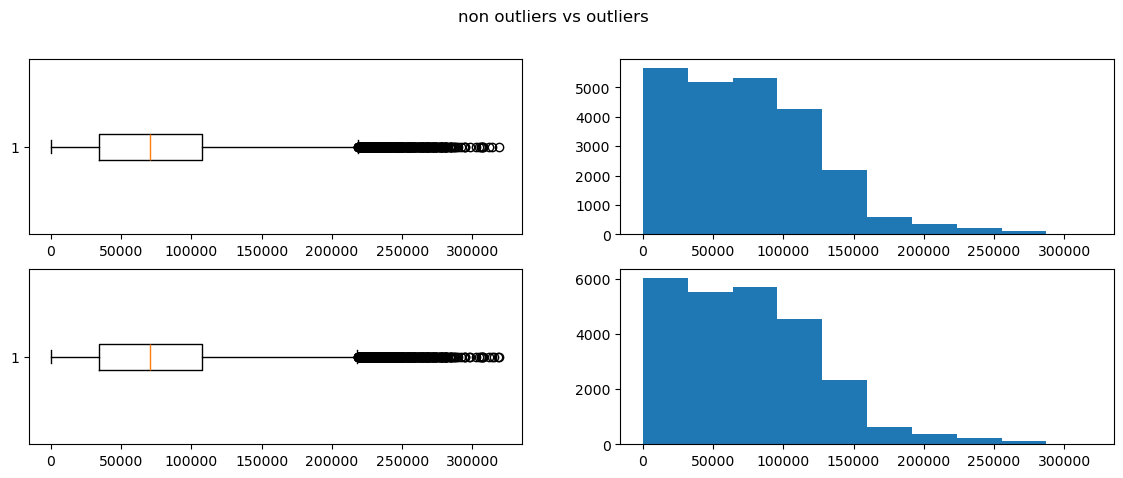

In [13]:
plt.figure(figsize=(14,5))
plt.suptitle("non outliers vs outliers")

plt.subplot(2,2,1).boxplot(nonout["prevailing_wage"],vert=False)
plt.subplot(2,2,2).hist(nonout["prevailing_wage"])

plt.subplot(2,2,3).boxplot(visa_df["prevailing_wage"],vert=False)
plt.subplot(2,2,4).hist(visa_df["prevailing_wage"])

plt.show()

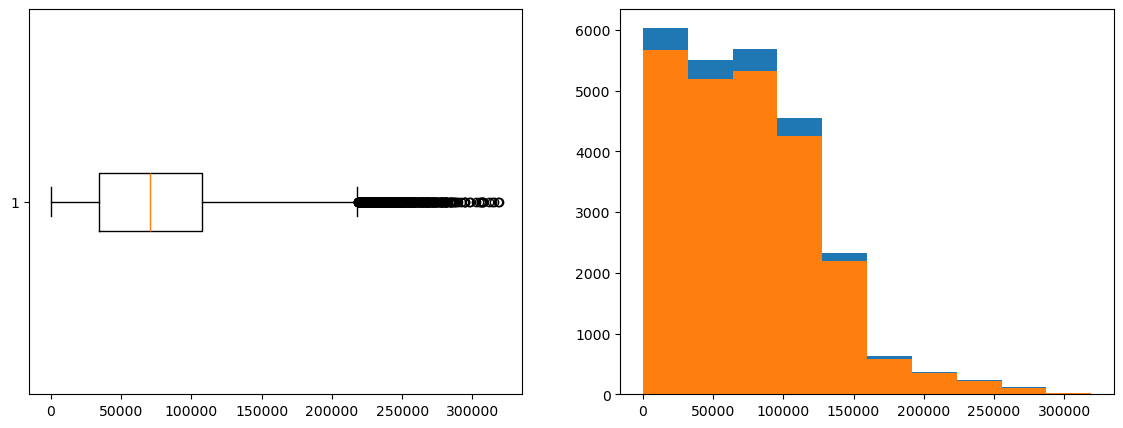

In [14]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage"],vert=False)

plt.subplot(1,2,2).hist(visa_df["prevailing_wage"])
plt.subplot(1,2,2).hist(nonout["prevailing_wage"])

plt.show()

### how to deal

- method 1
  - drop
    - not a good idea
    - 1.7% data will get lost (427/25480*100)
- method 2
  - fill with median
- method 3
  - fill with q1,q3
    - all lb values replace with q1 or lb
    - all ub values replace with q3 or ub

In [15]:
mediann=round(np.median(visa_df["prevailing_wage"]),2)
mediann

70308.21

In [22]:
l=[]

q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

mediann=round(np.median(visa_df["prevailing_wage"]),2)
mediann

for i in visa_df["prevailing_wage"].values:
    if i<lb or i>ub:
        l.append(mediann)
    else:
        l.append(i)

In [21]:
df1=visa_df.copy()
df1["prevailing_wage"]=l
df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


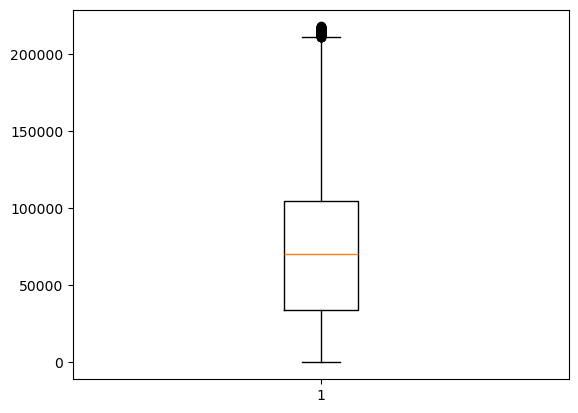

In [18]:
plt.boxplot(df1["prevailing_wage"])
plt.show()

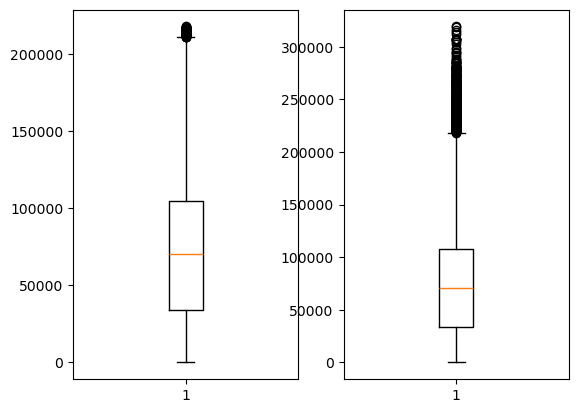

In [19]:
plt.subplot(1,2,1).boxplot(df1["prevailing_wage"]),
plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"])
plt.show()

- replace with q1,q3

In [24]:
l=[]

q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

for i in visa_df["prevailing_wage"].values:
    if i<lb:
        l.append(lb)
    elif i>ub:
        l.append(ub)
    else:
        l.append(i)

df1=visa_df.copy()
df1["prevailing_wage"]=l
df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,218315.56125,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified


In [28]:
lb,ub

(-76564.56875000002, 218315.56125000003)

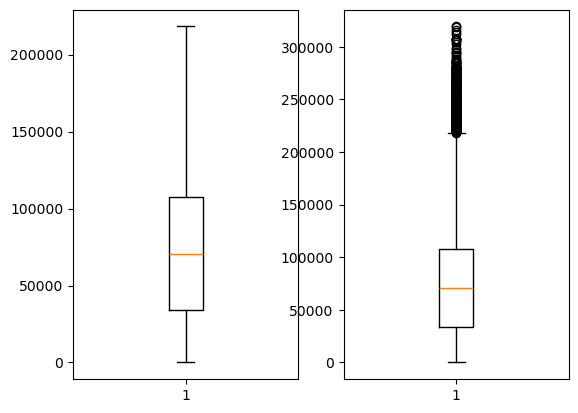

In [17]:
l=[]

q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

for i in visa_df["prevailing_wage"].values:
    if i<lb:
        l.append(lb)
    elif i>ub:
        l.append(ub)
    else:
        l.append(i)

df1=visa_df.copy()
df1["prevailing_wage"]=l
df1

plt.subplot(1,2,1).boxplot(df1["prevailing_wage"]),
plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"])
plt.show()

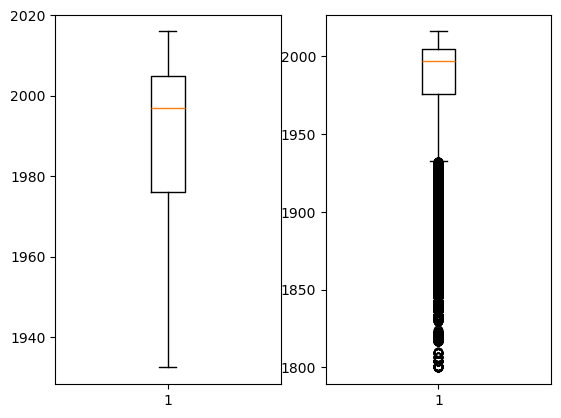

In [18]:
l=[]

q1=np.percentile(visa_df["yr_of_estab"],q=25)
q3=np.percentile(visa_df["yr_of_estab"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

for i in visa_df["yr_of_estab"].values:
    if i<lb:
        l.append(lb)
    elif i>ub:
        l.append(ub)
    else:
        l.append(i)

df1=visa_df.copy()
df1["yr_of_estab"]=l
df1

plt.subplot(1,2,1).boxplot(df1["yr_of_estab"]),
plt.subplot(1,2,2).boxplot(visa_df["yr_of_estab"])
plt.show()

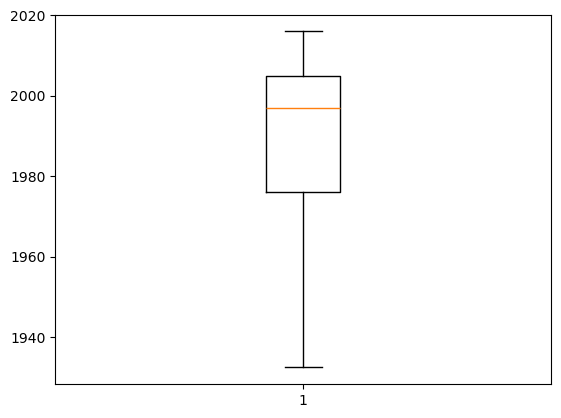

In [19]:
l=[]

q1=np.percentile(visa_df["yr_of_estab"],q=25)
q3=np.percentile(visa_df["yr_of_estab"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

for i in visa_df["yr_of_estab"].values:
    if i<lb:
        l.append(lb)
    elif i>ub:
        l.append(ub)
    else:
        l.append(i)

df1=visa_df.copy()
df1["yr_of_estab"]=l
df1

plt.boxplot(df1["yr_of_estab"])
plt.show()

In [18]:
df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,218315.56125,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified


### np.where condition

- np.where is used for binary condition
- 3 args
  - con
  - val if con is True
  - another val if con is False

In [21]:
d={"sub":["DS","ML"],
  "marks":[100,120]}
df=pd.DataFrame(d)
df

,sub,marks
0,DS,100
1,ML,120


In [22]:
df["marks"]>100

0    False
1     True
Name: marks, dtype: bool

In [23]:
con=df["marks"]>100
l=np.where(con,1,df["marks"])
l

array([100,   1], dtype=int64)

In [13]:
q1=np.percentile(visa_df["prevailing_wage"],q=25)
q3=np.percentile(visa_df["prevailing_wage"],q=75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

mediann=round(np.median(visa_df["prevailing_wage"]),2)

con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub
con=con1|con2
ll=np.where(con,mediann,visa_df["prevailing_wage"])
ll

# l=[]

# q1=np.percentile(visa_df["prevailing_wage"],q=25)
# q3=np.percentile(visa_df["prevailing_wage"],q=75)
# iqr=q3-q1
# lb=q1-1.5*iqr
# ub=q3+1.5*iqr

# mediann=round(np.median(visa_df["prevailing_wage"]),2)

# for i in visa_df["prevailing_wage"].values:
#     if i<lb or i>ub:
#         l.append(mediann)
#     else:
#         l.append(i)
# l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [15]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
col=visa_df.select_dtypes(exclude="object").columns
col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,7227.0,2007.0,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,7227.0,2008.0,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98.0,1932.5,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.39000,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274.0,2006.0,Northeast,218315.56125,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121.0,1932.5,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918.0,1932.5,West,86154.77000,Year,Y,Certified


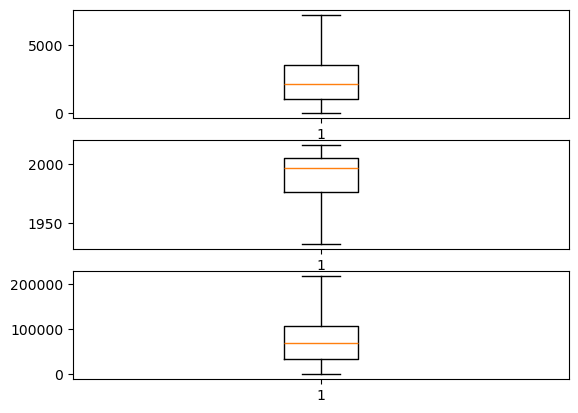

In [27]:
l=[]
k=1
df1=visa_df.copy()
for i in col:
    q1=np.percentile(visa_df[i],q=25)
    q3=np.percentile(visa_df[i],q=75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    l=[]
    for j in visa_df[i].values:
        if j<lb:
            l.append(lb)
        elif j>ub:
            l.append(ub)
        else:
            l.append(j)
    df1[i]=l
    
    plt.subplot(3,1,k).boxplot(df1[i])
    k=k+1
df1